In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats

In [3]:
df = pd.read_csv('/home/is/shuntaro-o/dev/persons_move_analysis/data/mobile_datas/02_gender_generation.csv')

In [5]:
df_month07 = df[df['date']<20220732]

In [38]:
df_month07_per_15 = df_month07[df_month07['age']==15]
df_month07_per_20 = df_month07[df_month07['age']==20]
df_month07_per_30 = df_month07[df_month07['age']==30]
df_month07_per_40 = df_month07[df_month07['age']==40]
df_month07_per_50 = df_month07[df_month07['age']==50]
df_month07_per_60 = df_month07[df_month07['age']==60]
df_month07_per_70 = df_month07[df_month07['age']==70]
df_month07_per_80 = df_month07[df_month07['age']==80]

In [39]:
day_list = ['01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24','25','26','27','28','29','30','31']
hour_list = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23']

In [48]:
list_perage_df = [df_month07_per_15, df_month07_per_20, df_month07_per_40, df_month07_per_50, df_month07_per_60, df_month07_per_70, df_month07_per_80]

In [49]:
estimate_from_mobile_data_per_age = []
for dataframe in list_perage_df:
    estimate_from_mobile_data = []
    for day in day_list:
        estimate_perday = []
        key_day = int('202207' + day)
        df_oneday = dataframe[dataframe['date']==key_day]
        for hour in range(0,24):
            key_hour = hour*100
            df_onehour =df_oneday[df_oneday['time']==key_hour]
            estimate_perday.append(df_onehour['population'].sum())
        estimate_from_mobile_data.append(estimate_perday)
    estimate_from_mobile_data_per_age.append(estimate_from_mobile_data)

In [32]:
# estimate_from_mobile_data = []
# for day in day_list:
#     estimate_perday = []
#     key_day = int('202207' + day)
#     df_oneday = df_month07_per_age[df_month07_per_age['date']==key_day]
#     for hour in range(0,24):
#         key_hour = hour*100
#         df_onehour =df_oneday[df_oneday['time']==key_hour]
#         estimate_perday.append(df_onehour['population'].sum())
#     estimate_from_mobile_data.append(estimate_perday)

In [51]:
estimate_from_mobile_data_per_age = np.array(estimate_from_mobile_data_per_age)

In [86]:
def min_max(x, axis=None):
    x_min = x.min(axis=axis, keepdims=True)
    x_max = x.max(axis=axis, keepdims=True)
    return (x - x_min) / (x_max - x_min)

In [87]:
normalization_estimate_from_mobile_data_per_age = min_max(estimate_from_mobile_data_per_age)

In [35]:
#np.save('/home/is/shuntaro-o/dev/persons_move_analysis/data/array_population_number_estimate/estimate_from_mobile_data', estimate_from_mobile_data)

In [ ]:
axes[0,0].set_title('age 15')
axes[0,1].set_title('age 20')
axes[0,2].set_title('age 30')
axes[1,0].set_title('age 40')
axes[1,1].set_title('age 50')
axes[1,2].set_title('age 60')
axes[2,0].set_title('age 70')

Text(0.5, 1.0, 'age 70')

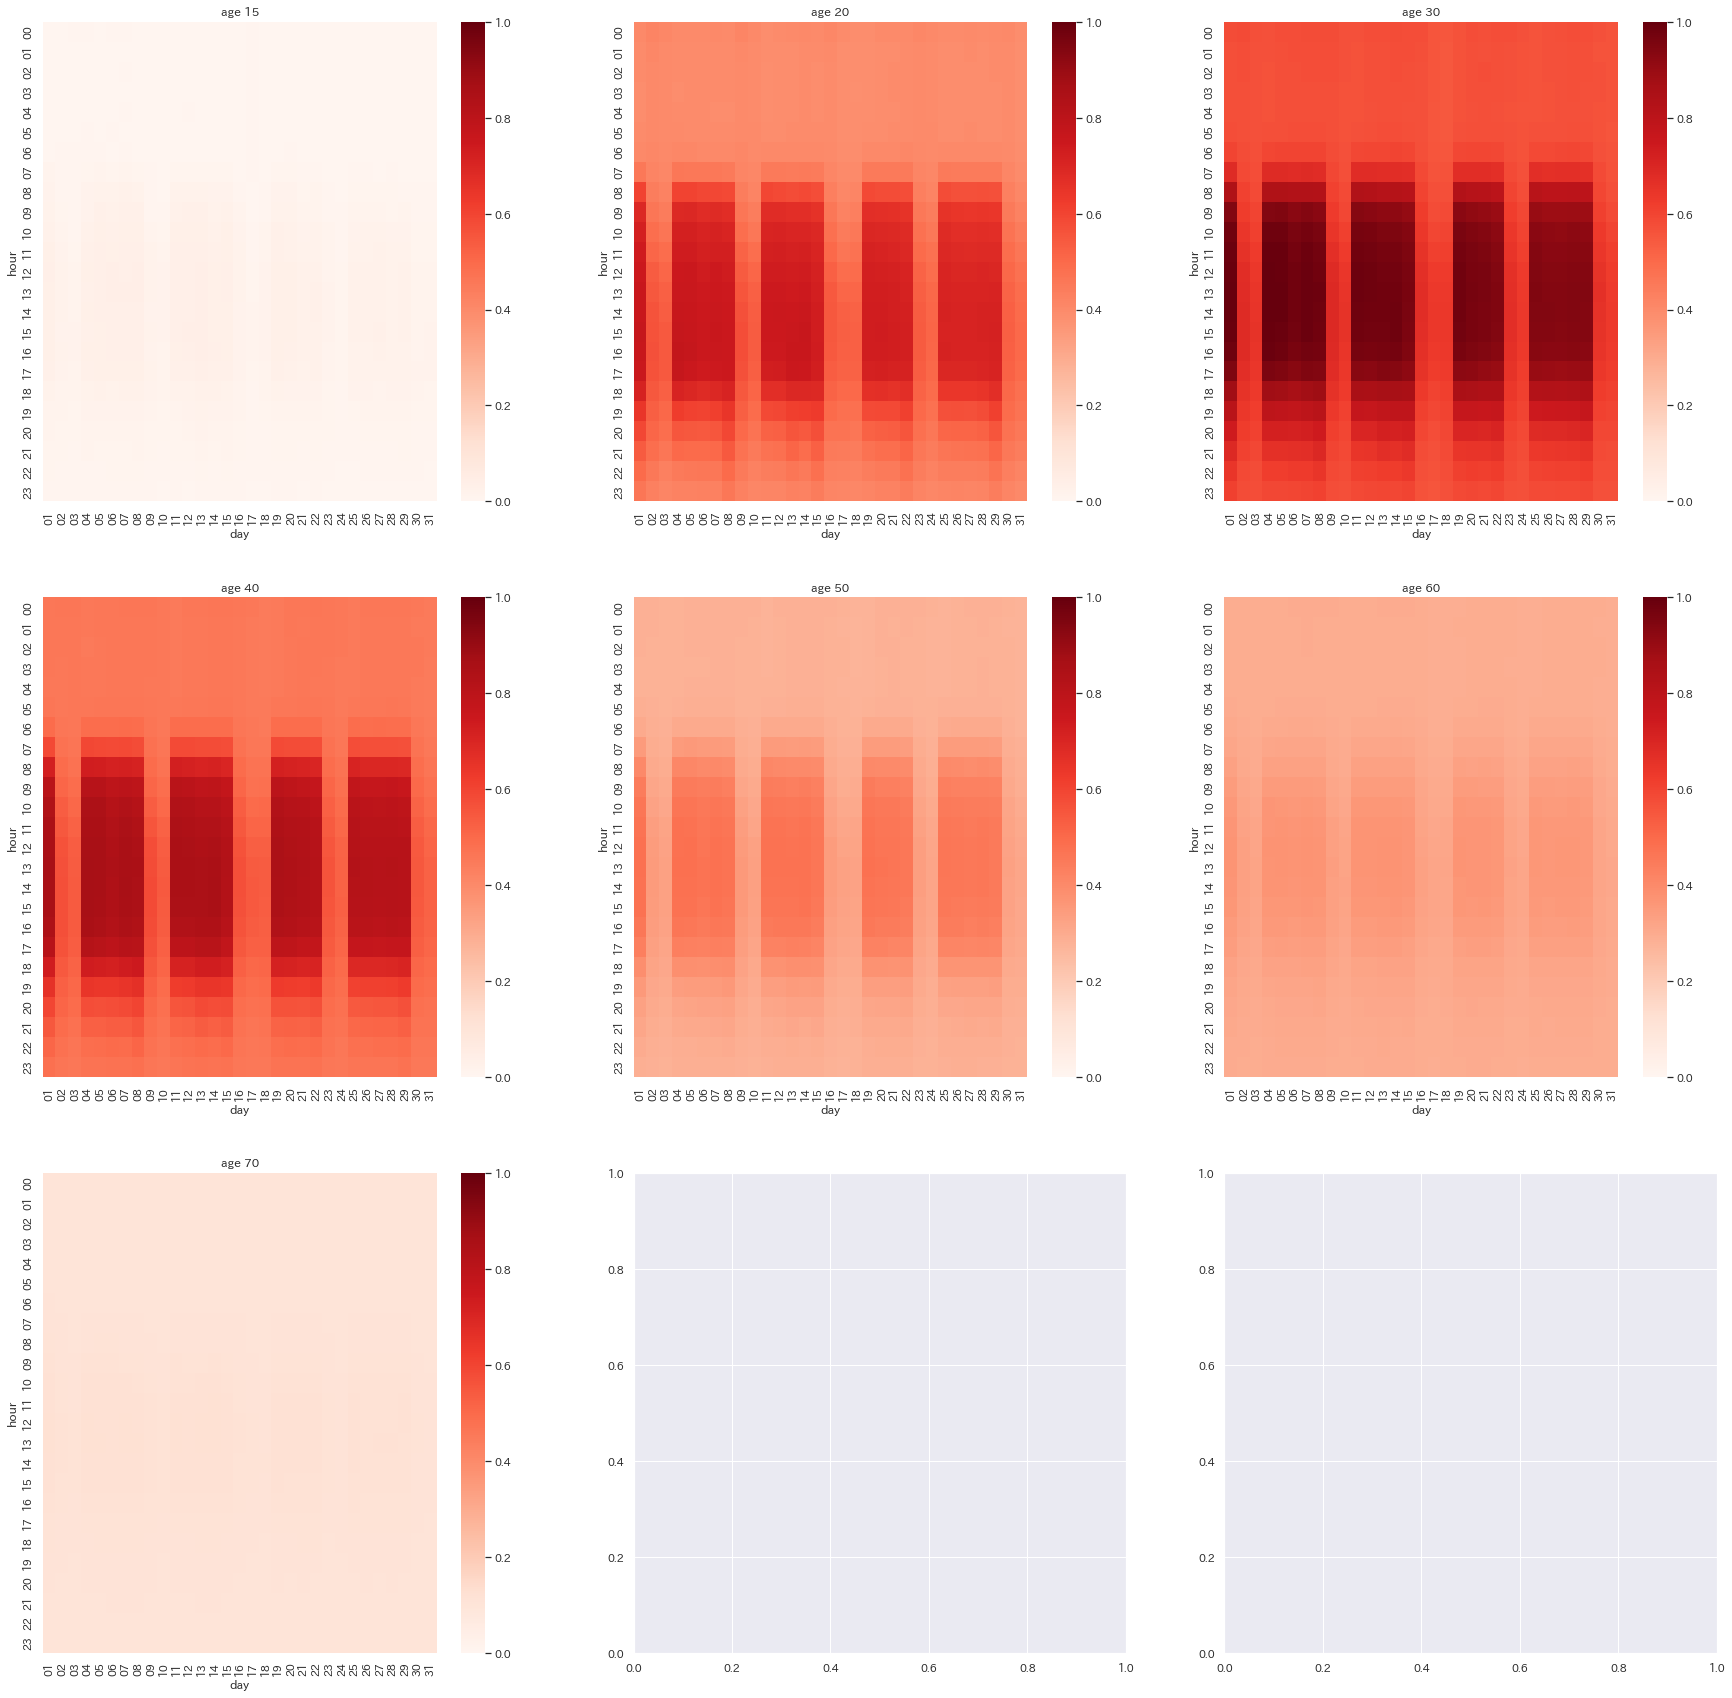

In [91]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(30, 30))

sns.heatmap(normalization_estimate_from_mobile_data_per_age[0].T,xticklabels=day_list, yticklabels=hour_list, cmap="Reds",ax=axes[0, 0], vmin=0, vmax=1)
sns.heatmap(normalization_estimate_from_mobile_data_per_age[1].T,xticklabels=day_list, yticklabels=hour_list, cmap="Reds",ax=axes[0, 1], vmin=0, vmax=1)
sns.heatmap(normalization_estimate_from_mobile_data_per_age[2].T,xticklabels=day_list, yticklabels=hour_list, cmap="Reds",ax=axes[0, 2], vmin=0, vmax=1)
sns.heatmap(normalization_estimate_from_mobile_data_per_age[3].T,xticklabels=day_list, yticklabels=hour_list, cmap="Reds",ax=axes[1, 0], vmin=0, vmax=1)
sns.heatmap(normalization_estimate_from_mobile_data_per_age[4].T,xticklabels=day_list, yticklabels=hour_list, cmap="Reds",ax=axes[1, 1], vmin=0, vmax=1)
sns.heatmap(normalization_estimate_from_mobile_data_per_age[5].T,xticklabels=day_list, yticklabels=hour_list, cmap="Reds",ax=axes[1, 2], vmin=0, vmax=1)
sns.heatmap(normalization_estimate_from_mobile_data_per_age[6].T,xticklabels=day_list, yticklabels=hour_list, cmap="Reds",ax=axes[2, 0], vmin=0, vmax=1)

axes[0,0].set_xlabel('day')
axes[0,1].set_xlabel('day')
axes[0,2].set_xlabel('day')
axes[1,0].set_xlabel('day')
axes[1,1].set_xlabel('day')
axes[1,2].set_xlabel('day')
axes[2,0].set_xlabel('day')

axes[0,0].set_ylabel('hour')
axes[0,1].set_ylabel('hour')
axes[0,2].set_ylabel('hour')
axes[1,0].set_ylabel('hour')
axes[1,1].set_ylabel('hour')
axes[1,2].set_ylabel('hour')
axes[2,0].set_ylabel('hour')

axes[0,0].set_title('age 15')
axes[0,1].set_title('age 20')
axes[0,2].set_title('age 30')
axes[1,0].set_title('age 40')
axes[1,1].set_title('age 50')
axes[1,2].set_title('age 60')
axes[2,0].set_title('age 70')

Text(69.0, 0.5, 'hour')

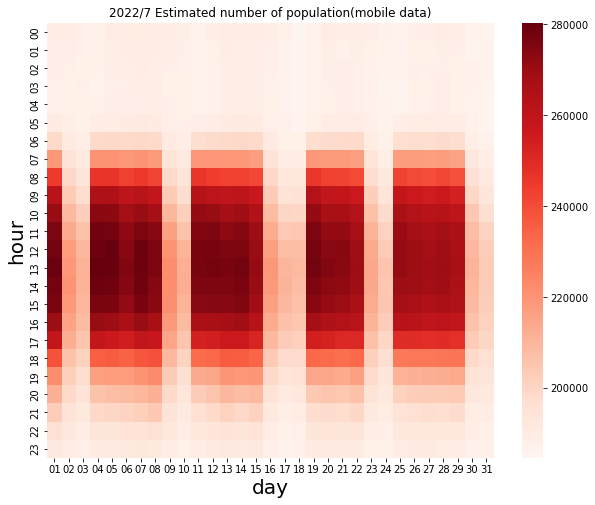

In [57]:
plt.subplots(facecolor="white",figsize=(10,8))
heatmap = sns.heatmap(estimate_from_mobile_data_per_age[4].T,xticklabels=day_list, yticklabels=hour_list, cmap="Reds")
heatmap.set_title('2022/7 Estimated number of population(mobile data)')
heatmap.set_xlabel('day',fontsize=20)
heatmap.set_ylabel('hour',fontsize=20)